In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
training_data=pd.read_csv('Table5-2.csv')
df = pd.read_csv("Table5-2.csv")

In [67]:
df

,ID\t,Speed,Agility,Draft
0,1,2.50,6.00,no
1,2,3.75,8.00,no
2,3,2.25,5.50,no
3,4,3.25,8.25,no
4,5,2.75,7.50,no
5,6,4.50,5.00,no
6,7,3.50,5.25,no
7,8,3.00,3.25,no
8,9,4.00,4.00,no
9,10,4.25,3.75,no


In [68]:
training_data=np.array(training_data)
print(training_data)

class_yes=[]
class_no=[]

for i in range(len(training_data)):
    if(training_data[i,3]=='  no'):
        class_no.append([training_data[i,1],training_data[i,2]])
    else:
        class_yes.append([training_data[i,1],training_data[i,2]])

class_no=np.array(class_no)
class_yes=np.array(class_yes)

[[1 2.5 6.0 '  no']
 [2 3.75 8.0 '  no']
 [3 2.25 5.5 '  no']
 [4 3.25 8.25 '  no']
 [5 2.75 7.5 '  no']
 [6 4.5 5.0 '  no']
 [7 3.5 5.25 '  no']
 [8 3.0 3.25 '  no']
 [9 4.0 4.0 '  no']
 [10 4.25 3.75 '  no']
 [11 2.0 2.0 '  no']
 [12 5.0 2.5 '  no']
 [13 8.25 8.5 '  no']
 [14 5.75 8.75 '  yes']
 [15 4.75 6.25 '  yes']
 [16 5.5 6.75 '  yes']
 [17 5.25 9.5 '  yes']
 [18 7.0 4.25 '  yes']
 [19 7.5 8.0 '  yes']
 [20 7.25 5.75 '  yes']]


In [42]:
class_no

array([[2.5 , 6.  ],
       [3.75, 8.  ],
       [2.25, 5.5 ],
       [3.25, 8.25],
       [2.75, 7.5 ],
       [4.5 , 5.  ],
       [3.5 , 5.25],
       [3.  , 3.25],
       [4.  , 4.  ],
       [4.25, 3.75],
       [2.  , 2.  ],
       [5.  , 2.5 ],
       [8.25, 8.5 ]])

In [43]:
class_yes

array([[5.75, 8.75],
       [4.75, 6.25],
       [5.5 , 6.75],
       [5.25, 9.5 ],
       [7.  , 4.25],
       [7.5 , 8.  ],
       [7.25, 5.75]])

In [87]:
x1=[]
x2=[]

i=2
while i<=8:
    x1.append(i)
    i+=0.5
print(x1)

i=2
while i<=8:
    x2.append(i)
    i = np.round(i+ 0.1,2)
print(x2)

x1,x2=np.meshgrid(x1,x2)
validation=np.column_stack((x1.ravel(),x2.ravel()))

[2, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
[2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0]


In [89]:
validation.shape

(793, 2)

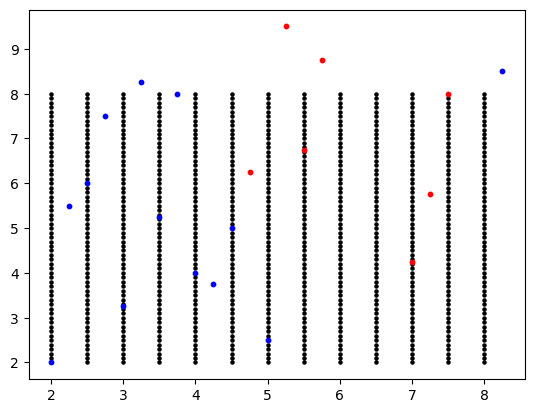

In [62]:
plt.scatter(validation[:,0],validation[:,1],s=5,color='black')
plt.scatter(class_no[:,0],class_no[:,1],s=10,color='blue')
plt.scatter(class_yes[:,0],class_yes[:,1],s=10,color='red')

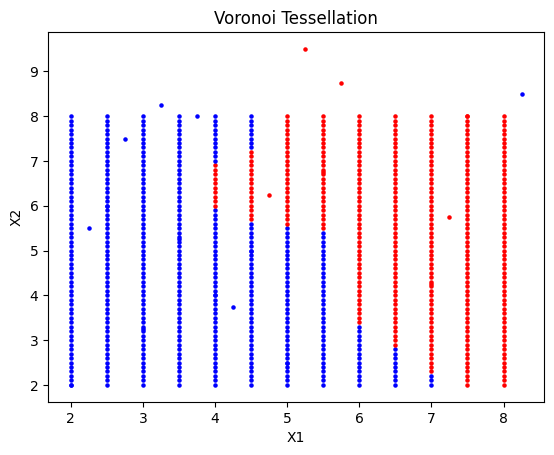

In [76]:
for pt in validation:
    dist = np.linalg.norm(pt - np.concatenate((class_yes,class_no)), axis=1)
    min_index = np.argmin(dist)
    if (dist[min_index] == dist[np.argsort(dist)[1]]  ):
        color='black'
    else:
        if min_index < len(class_yes):
            color = 'red'
        else:
            color = 'blue' 
    plt.scatter(pt[0], pt[1], color=color,s=5)

plt.scatter(class_yes[:, 0], class_yes[:, 1], color='red', label='Yes',s=5)
plt.scatter(class_no[:, 0], class_no[:, 1], color='blue', label='No',s=5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Voronoi Tessellation')
plt.show()

In [95]:
test_sample = np.array(input("Enter test sample (x1,x2): ").split(','), dtype=float)
distances = np.linalg.norm(test_sample - np.concatenate((class_yes, class_no)), axis=1)
min_index = np.argmin(distances)
if distances[min_index] == distances[np.argsort(distances)[1]]:
    print("Neutral.")
else:
    if min_index < len(class_yes):
        predicted = 'Yes'
    else:
        predicted = 'No'
    print("Predicted class for test sample is:", predicted)

Enter test sample (x1,x2):  5.5,5.5


Predicted class for test sample is: Yes


/tmp/ipykernel_4616/802690032.py:6: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (distances[nearest_indices] ** 2)


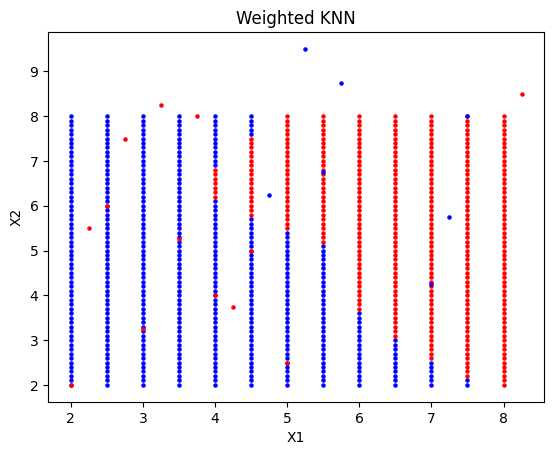

In [86]:
k=3

for pt in validation:
    distances = np.linalg.norm(pt - np.concatenate((class_yes,class_no)), axis=1)
    nearest_indices = np.argsort(distances)[:k]
    weights = 1 / (distances[nearest_indices] ** 2)
    class_Yes_weight = 0
    class_No_weight = 0
    j=0
    for i in nearest_indices:
        if i<len(class_yes):
            class_Yes_weight+=weights[j]
        else:
            class_No_weight+=weights[j]
        j+=1
    if class_Yes_weight > class_No_weight:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter(pt[0], pt[1], color=color,s=5)


plt.scatter(class_no[:, 0], class_no[:, 1], color='red', label='Yes',s=5)
plt.scatter(class_yes[:, 0], class_yes[:, 1], color='blue', label='No',s=5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Weighted KNN')
plt.show()

In [90]:
validation

array([[2. , 2. ],
       [2.5, 2. ],
       [3. , 2. ],
       ...,
       [7. , 8. ],
       [7.5, 8. ],
       [8. , 8. ]])

In [92]:
x = validation[8,:]